In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("HepatitisCdata.csv")
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
data= data.drop(["Unnamed: 0"], axis=1)

In [5]:
li = list(data["Category"])
li2 = []
for i in range(len(li)) :
    if li[i] == "0=Blood Donor":
            li2.append(0)
    elif li[i] == "0s=suspect Blood Donor":
        li2.append(1)
    elif li[i] == "1=Hepatitis":
        li2.append(2)
    else :
        li2.append(3)
data["NewCat"]= li2

In [6]:
data =data.drop(["Category"], axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    object 
 2   ALB     614 non-null    float64
 3   ALP     597 non-null    float64
 4   ALT     614 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    605 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    614 non-null    float64
 12  NewCat  615 non-null    int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [7]:
X = data.iloc[:,0:12].values
y = data.iloc[:, -1].values

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [9]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy ='mean')
si = si.fit(X[:, 0:13 ])

In [10]:
X[:, 0:13 ] = si.transform(X[:, 0:13 ])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
SD=StandardScaler()
X_test=SD.fit_transform(X_test)
X_train = SD.fit_transform(X_train)

In [13]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score
xgmean = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =3)
print(xgmean.mean())

0.9522960699431288


c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

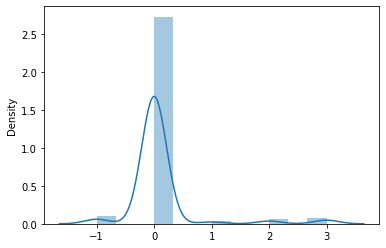

In [16]:
import seaborn as sns 
sns.distplot(y_test-y_predxg)